Quantum Circuit for Number: 1 (increment)


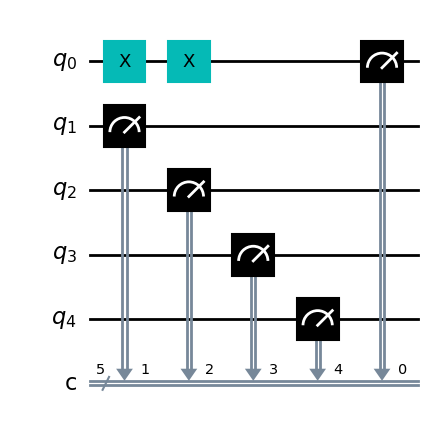

Number 2 is even, returned as is.
Number 2 is even, returned as is.
Number 4 is even, returned as is.
Quantum Circuit for Number: 5 (increment)


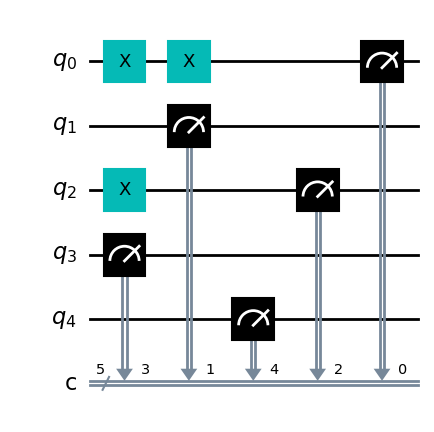

Number 6 is even, returned as is.
Quantum Circuit for Number: 7 (decrement)


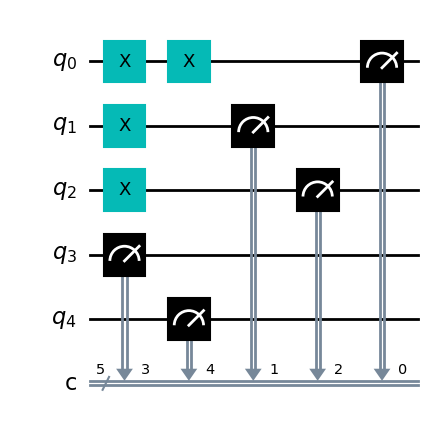

Quantum Circuit for Number: 11 (increment)


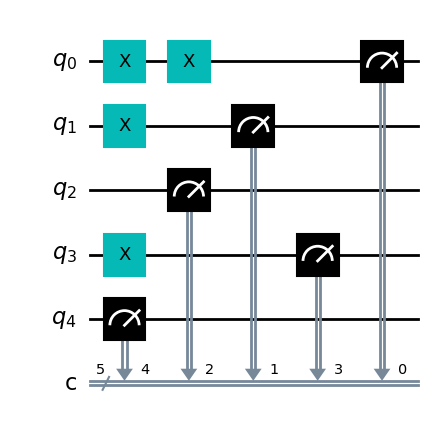

Quantum Circuit for Number: 17 (decrement)


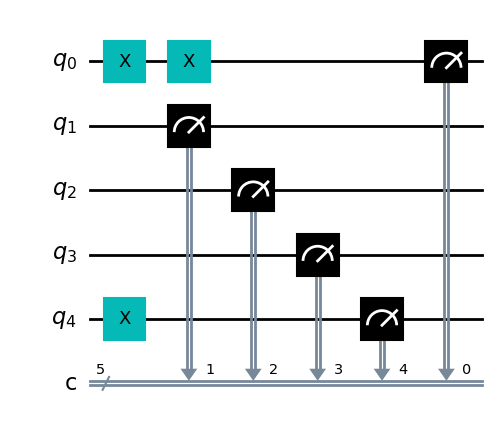

Quantum Circuit for Number: 21 (increment)


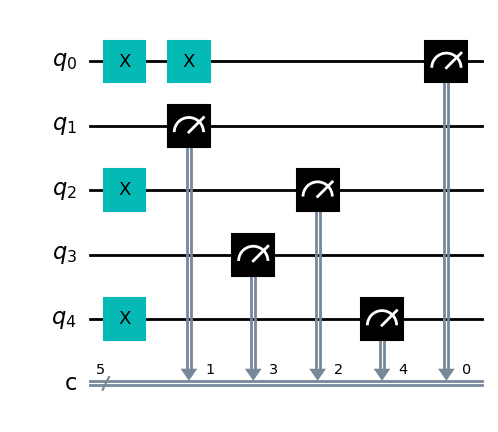

Number 22 is even, returned as is.
Quantum Circuit for Number: 23 (decrement)


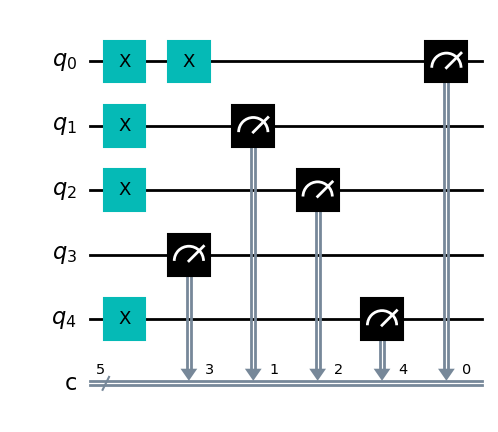

Quantum simulation results for numbers within [1, 31): [0, 2, 2, 4, 4, 6, 6, 10, 16, 20, 22, 22]


In [5]:
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit import QuantumCircuit, transpile, execute, Aer
from IPython.display import display
import random
import math

def simulate_odd_to_even_quantum_and_plot(n, number, shots=1000):
    # Calculate k from n, where n = 2^k
    k = math.ceil(math.log2(n))
    
    # Check if the number is within the range [1, n)
    if not (1 <= number < n):
        print(f"Number {number} is outside the range [1, {n})")
        return
    
    # For even numbers, return without quantum operation
    if number % 2 == 0:
        print(f"Number {number} is even, returned as is.")
        return number, None
    
    qc = QuantumCircuit(k, k)
    
    operation = "increment" if random.choice([True, False]) or number == 1 else "decrement"
    for i in range(k):
        if number & (1 << i):
            qc.x(i)

    if operation == "increment":
        qc.x(0)  # Flip LSB to increment
    elif operation == "decrement":
        qc.x(0)  # Flip LSB to decrement

    qc.measure(range(k), range(k))
    
    print(f"Quantum Circuit for Number: {number} ({operation})")
    display(qc.draw(output='mpl'))  # Draw and display the circuit

    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    result = execute(compiled_circuit, simulator, shots=shots).result()
    counts = result.get_counts()

    plot_histogram(counts)
    plt.show()

    int_results = {int(state, 2): count for state, count in counts.items()}
    most_frequent_state = max(int_results, key=int_results.get)
    
    return most_frequent_state, qc  # Return QuantumCircuit object

def simulate_list_odd_to_even_quantum_and_plot(n, numbers, shots=1000):
    results = []
    circuits = []
    for number in numbers:
        result, circuit = simulate_odd_to_even_quantum_and_plot(n, number, shots)
        results.append(result)
        circuits.append(circuit)
    return results, circuits

# Example usage
n = 31  # Define n, the upper limit of the range [1, n)
numbers = [1, 2, 2, 4, 5, 6, 7, 11, 17, 21, 22, 23]  # List of numbers to process
results, circuits = simulate_list_odd_to_even_quantum_and_plot(n, numbers, shots=1000)
print(f"Quantum simulation results for numbers within [1, {n}):", results)
